**The goal** of this tutorial is to learn how to decoupled  dataset code from our model training code for better readability and modularity.

PyTorch provides two data primitives:
* torch.utils.data.DataLoader
* torch.utils.data.Dataset

**Dataset** allow you to use pre-loaded datasets as well as Load your own data and **DataLoader** wraps an iterable around the Dataset to enable easy access to the samples.



PyTorch domain libraries provide a number of pre-loaded datasets:  Image Datasets, Text Datasets, and Audio Datasets.

**Examples of Image DataSet:**
Torchvision (torchvision.datasets module) provides many built-in datasets, such as:
* Image classification

 -- fashion-mnist: https://github.com/zalandoresearch/fashion-mnist : https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

 -- Oxford 102 Flower: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/ : https://pytorch.org/vision/stable/generated/torchvision.datasets.Flowers102.html#torchvision.datasets.Flowers102 > + classes + segments  

* Image detection or segmentation

 -- The Oxford-IIIT Pet Dataset: https://www.robots.ox.ac.uk/~vgg/data/pets/ : https://pytorch.org/vision/stable/generated/torchvision.datasets.OxfordIIITPet.html#torchvision.datasets.OxfordIIITPet

**Examples of Text Dataset:**
 from torchtext.datasets module, such as:

* Text Classification

 -- AmazonReviewFull : train: 3000000 sample , and test: 650000 sample, ~35 million reviews up to March 2013,

 -- AG_NEWS  :  train: 120000, and test: 7600, 4 largest classes (“World”, “Sports”, “Business”, “Sci/Tech”).

* Question Answer

 -- SQuAD 1.0: train: 87599, and dev: 10570.

 -- SQuAD 2.0 : train: 130319, and dev: 11873.

**Examples of Audio Dataset:**

 -- CommonVoice
  



## **Lets Practice:**

 Load the Fashion-MNIST dataset from TorchVision.

 Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.


**Load with the following parameters:**


 -- **root** is the path where the train/test data is stored.

 -- **train** specifies training or test dataset.

 -- **download=True** downloads the data from the internet if it’s not available at root.

 -- **transform** and **target_transform** specify the feature and label transformations.

In [89]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor #A transformation that converts images (e.g., PIL images or NumPy arrays) into PyTorch tensors.
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [90]:
####### other way to dawnload data #############
training_data = datasets.FashionMNIST(
    root='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
    train=True,
    download=False,
    transform=ToTensor()
)

**Iterating and Visualizing the Dataset**

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

In [91]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

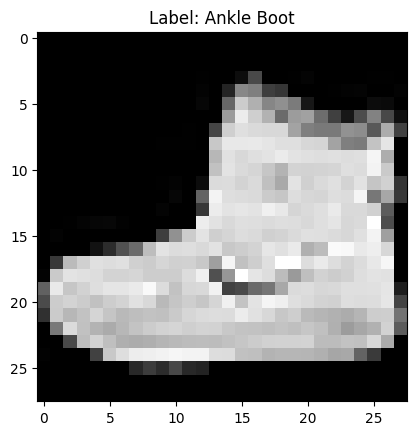

In [92]:
 #img: The image (a PyTorch tensor of shape [1, 28, 28]).
 #label: The numeric label (an integer between 0 and 9).

image, label = training_data[0]

#img.squeeze() removes the singleton dimension from the image tensor, converting it from shape [1, 28, 28] to [28, 28].

plt.imshow(image.squeeze(), cmap="gray")
#plt.imshow(image.squeeze(), cmap="viridis")

plt.title(f"Label: {label}")
plt.axis("on") #default
#plt.axis("off")
plt.title(f"Label: {labels_map[label]}")
plt.show()

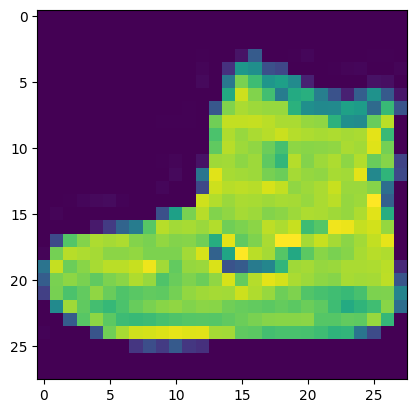

In [93]:
plt.imshow(image.squeeze(), cmap="viridis") # squeeze() function removes dimensions of size 1
#For example:
#(1, 256, 256) → (256, 256)
#(3, 1, 256, 256) → (3, 256, 256)


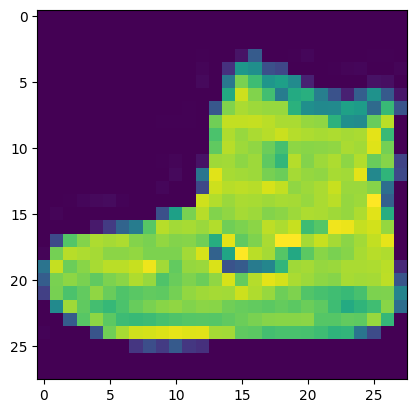

In [100]:
img1 = image.permute(1, 2, 0)
plt.imshow(img1, cmap="viridis")
#PyTorch datasets typically store images in (C, H, W) format (Channels, Height, Width).
#Libraries like matplotlib require images in (H, W, C) format (Height, Width, Channels).
#Use permute(1, 2, 0) to rearrange the dimensions for compatibility with such libraries.

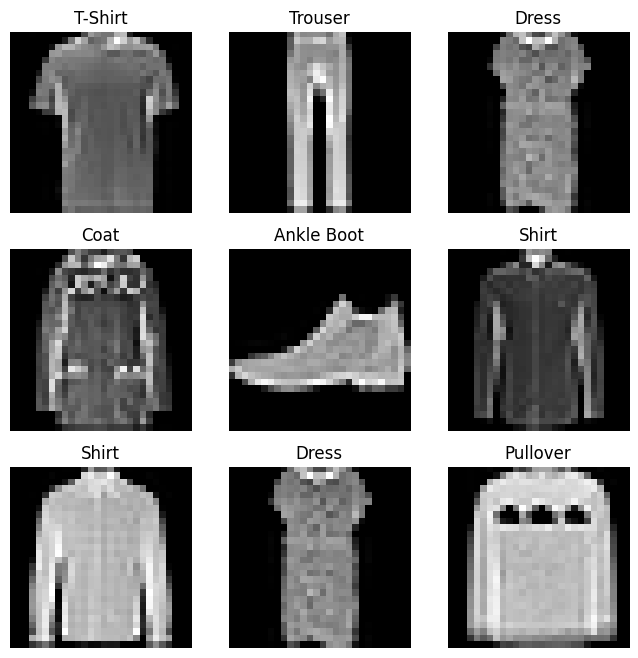

In [95]:

figure = plt.figure(figsize=(8, 8)) # creates a figure (a blank canvas) for plotting images using matplotlib.

# images will be displayed in a 3x3 grid.
cols, rows = 3, 3

# This loop iterates 9 times (cols * rows = 9) to display 9 random images from the dataset.
# range : it starts from 1 ( not 0 ) to 10 ( exclusive)

for i in range(1, cols * rows + 1):

  # torch.randint:  generates a random integer between 0 and len(training_data) - 1 (the total number of images in the training dataset).
  #  torch.randint: Returns a tensor filled with random integers generated uniformly between low (inclusive) and high (exclusive).
  # size (tuple) – a tuple defining the shape of the output tensor.

    sample_idx = torch.randint(len(training_data), size=(1,)).item() # .item() converts the tensor to a Python integer.
    img, label = training_data[sample_idx]

    # This adds a subplot to the figure at position i in the grid.

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])

    #hides the axes (x and y ticks) for the subplot
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")


plt.show()



**Preparing your data for training with DataLoaders**

The Dataset retrieves our dataset’s features and labels ***one sample at a time***. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.



In [96]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

**Iterate through the DataLoader**

Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


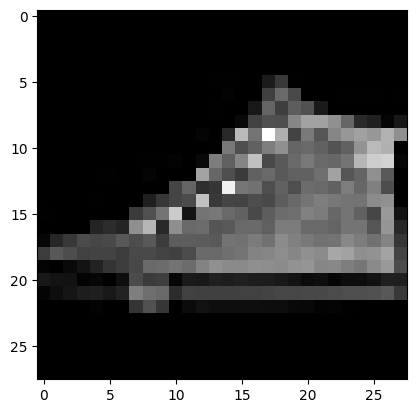

Label: 7
Label: Sneaker


In [97]:
# Display image and label.
#The iter() function converts the DataLoader into an iterator.
#An iterator is an object that allows you to traverse through all the elements of a collection (in this case, the batches of data in the DataLoader).
#Once the DataLoader is converted to an iterator, you can use the next() function to retrieve the next batch of data.

train_features, train_labels = next(iter(train_dataloader))

# train_features has the shape [batch_size, channels, height, width].
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(f"Label: {labels_map[label]}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


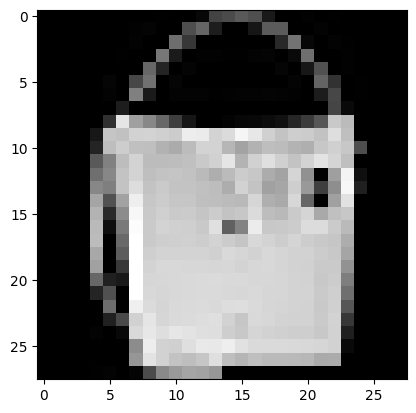

Label: 8


In [98]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[63].squeeze()
label = train_labels[63]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [99]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[64].squeeze()
label = train_labels[64]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


IndexError: index 64 is out of bounds for dimension 0 with size 64

# **Oxford 102 Flower**

In [101]:
training_data_2 = datasets.Flowers102(
    root="data",
    split='train',
    download=True,
    transform=ToTensor()
)

test_data_2 = datasets.Flowers102(
    root="data",
    split='test',
    download=True,
    transform=ToTensor()
)

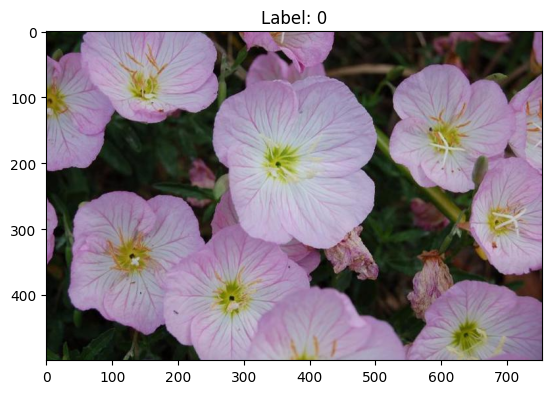

In [102]:

image2, label = training_data_2[0]

img = image2.permute(1, 2, 0)

plt.imshow(img)

plt.title(f"Label: {label}")
plt.axis("on") #default
#plt.axis("off")
plt.show()

**Reference**:

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


**Lab Assignment**

**Complete the code by implementing the following steps:**

* Load the Data:
Use PyTorch's DataLoader to load the training data and test data.
* Set Batch Size and Shuffle:
Configure the DataLoader with a batch size of 40 and enable shuffling to randomize the data.
* Extract a Batch:
Retrieve one batch of images and corresponding labels from the DataLoader.
* Display Images:
Display 12 images from the batch in a 3x4 grid using matplotlib. Ensure the images are properly formatted for display.